In [413]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

In [414]:
df=pd.read_csv('diabetes.csv')
df.head(20)


,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
5,5,116,74,0,0,25.6,0.201,30,tested_negative
6,3,78,50,32,88,31.0,0.248,26,tested_positive
7,10,115,0,0,0,35.3,0.134,29,tested_negative
8,2,197,70,45,543,30.5,0.158,53,tested_positive
9,8,125,96,0,0,0.0,0.232,54,tested_positive


In [415]:
df.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [416]:
'''What is the percentage of patients who tested positive for diabetes'''
df['class'].value_counts()

tested_negative    500
tested_positive    268
Name: class, dtype: int64

In [417]:
Percentage=(268/768)*100
print(Percentage)

34.89583333333333


In [418]:
'''Analyse the pedigree function vs class (diabetic or not). Visualize using appropriate 
plot'''
df['pedigree_class']=pd.cut(df.pedi,bins=[0.078000,0.243750,0.626250,2.420000],labels=['Low','Medium','High'])
crosstb3=pd.crosstab(df['class'],df.pedigree_class)
print(crosstb3)

pedigree_class   Low  Medium  High
class                             
tested_negative  142     258    99
tested_positive   49     126    93


Text(0, 0.5, 'Pedi FUnction')

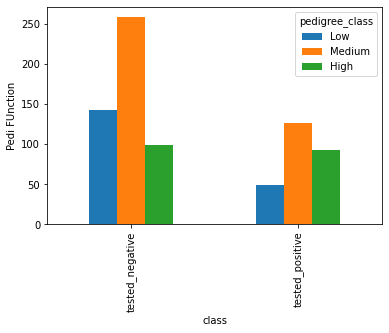

In [419]:
barplt = crosstb3.plot.bar()
plt.ylabel("Pedi FUnction")

In [420]:
'''Tabulate the Diastolic blood pressure with class (Diabetic or not).'''
df['pressure_class']=pd.cut(df.pres,bins=[0,80,89,110],labels=['Normal','At Risk','High Blood Pressure'])
df_1=df[["class","pressure_class"]]
crosstb=pd.crosstab(df['class'],df.pressure_class)
print(crosstb)

pressure_class   Normal  At Risk  High Blood Pressure
class                                                
tested_negative     393       57                   30
tested_positive     175       48                   28


Text(0, 0.5, 'Count')

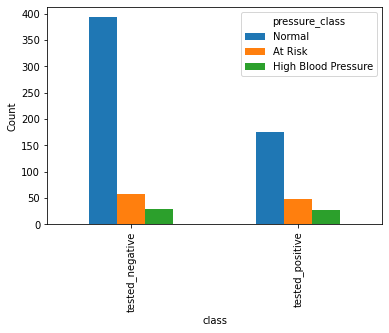

In [421]:
barplt = crosstb.plot.bar()
plt.ylabel("Count")

In [422]:
'''Tabulate the patients age wise, number of pregnancies wise with respect to the class'''
df['Age_class']=pd.cut(df.age,bins=[20,30,50,90],labels=['Young','Middle Aged','Old Aged'])
df_2=df[["class","Age_class"]]
cross=pd.crosstab(df['class'],df.Age_class)
print(cross)


Age_class        Young  Middle Aged  Old Aged
class                                        
tested_negative    327          130        43
tested_positive     90          140        38


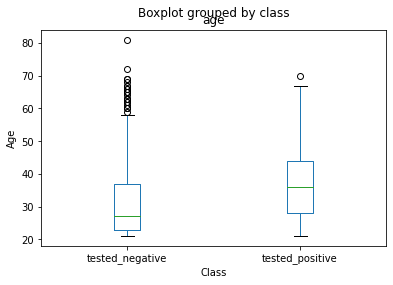

In [423]:
df.boxplot(by ='class', column =['age'], grid = False)
plt.ylabel("Age")
plt.xlabel("Class")
plt.show()

In [424]:
cross1=pd.crosstab(df['class'],df.preg)
print(cross1)

preg             0    1   2   3   4   5   6   7   8   9   10  11  12  13  14  \
class                                                                          
tested_negative  73  106  84  48  45  36  34  20  16  10  14   4   5   5   0   
tested_positive  38   29  19  27  23  21  16  25  22  18  10   7   4   5   2   

preg             15  17  
class                    
tested_negative   0   0  
tested_positive   1   1  


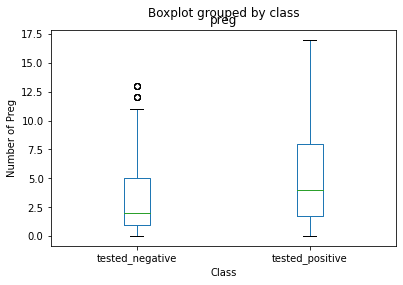

In [425]:
df.boxplot(by ='class', column =['preg'], grid = False)
plt.ylabel("Number of Preg")
plt.xlabel("Class")
plt.show()

In [426]:
'''Find and list all attributes that are related to class (diabetic or not) using appropriate 
tests'''
#We can see from abpve box plot that people with higher age have high chance of testing positive and same is the case with number of pregnancy.
c, p, dof, expected = chi2_contingency(crosstb3) #For pedigree and class relation
print(p)
a, d, dof1, expected1 = chi2_contingency(crosstb) #For pressure and class relation
print(d)

8.309004971644578e-06
0.0008416214947300422
